<font color = '#F1C40F'>

<a id = "1"></a><br>
#  CUSTOMER RELATİONSHİP MANAGEMENT(CRM) 
<img style="float: margin:1000px 50px 50px 1px; max-width:500px" src="https://www.it-zoom.de/fileadmin/user_upload/a-crm-kunden_gi_istock_gip-1600.jpg">


# 
    
<font color = '#FF7F50'>

Content:
1. [Customer Relationship Management (CRM)](#1)
* [What is CRM?](#2)
* [What is the purpose?](#3)
* [Content of Dataset](#4)
* [Attribute Information](#5)
2. [Library Import](#6)
3. [Data Preprocessing](#7)
4. [RFM](#10)
* [What is RFM?](#11)
* [RFM Segments](#12)
5. [What is Customer Lifetime Value(CLV or CLTV)?](#13)
* [CLTV Calculated](#14)
6. [CLTV Predicted](#15)
* [What is a cohort model?](#16)
* [BG-NBD](#17)
* [Gamma Gamma](#18)
7. [Result](#19)
8. [Summary](#20)


<font color = '#34495E'>

 <a id = "2"></a><br>
### What is CRM? 

Customer relationship management (CRM) is the combination of practices, strategies and technologies that companies use to manage and analyze customer interactions and data throughout the customer lifecycle. The goal is to improve customer service relationships and assist in customer retention and drive sales growth. CRM systems compile customer data across different channels, or points of contact, between the customer and the company, which could include the company's website, telephone, live chat, direct mail, marketing materials and social networks. CRM systems can also give customer-facing staff members detailed information on customers' personal information, purchase history, buying preferences and concerns.
    
    * Quelle https://keap.com/product/what-is-crm

 <a id = "3"></a><br>
### What is the purpose?

We will add statistics and probability pattern to the above formula. There will be BG / NBD and Gamma Gamma models that will make this happen to us. These models will do such a thing that they will model the purchasing behavior of all customers of this company, after modeling the purchasing behavior of all customers, they will replace the individual's personal characteristics in this model and reduce the expected number of sales to the person from the general audience pattern.

BG NBD and Gamma Gamma models are statistical models, not machine learning models. In fact, these models have the expression "Conditional" at the beginning.
<a id = "4"></a><br>
### Content of Dataset

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

<a id = "5"></a><br>
### Attribute Information:

InvoiceNo: Invoice number. If this code starts with the letter 'c', it indicates a cancellation.
StockCode: Product code.
Description: Product name.
Quantity: The quantities of each product per transaction.
InvoiceDate: Invoice date and time.The day and time when a transaction was generated.
UnitPrice: Unit price. Product price per unit in sterling.
CustomerID: Customer number.A 5-digit integral number uniquely assigned to each customer.
Country: Country name. The name of the country where a customer resides.





# Dataset import

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


    
<font color = '#F1C40F'>

<a id = "6"></a><br>
#  Library Import

In [16]:
!pip install -U pip

     |████████████████████████████████| 1.7 MB 4.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [17]:
!pip install xlrd
!pip install openpyxl
!pip install lifetimes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")

In [18]:
df1=pd.read_excel('online_retail_II.xlsx',
                  sheet_name="Year 2009-2010")

In [19]:
#copy

df=df1.copy()

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
#Checking Variables

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(525461, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
##################### Tail #####################
       Invoice 

<font color = '#D35400'>

Check out descriptive statistics of numerical variables. See the difference between 75% and 99% values and then See the difference between 99% and max values. We can think that there are some outliers.

In [22]:
#Are there any missing observations in the dataset?
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [23]:
def crm_data(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    return dataframe

In [24]:
df=crm_data(df)
check_df(df)

##################### Shape #####################
(407695, 9)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom 

In [25]:
#Missing values are deleted
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [26]:
#How many unique items in the dataset?
df["Description"].nunique()

4444

In [27]:
#How many product in the dataset?
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    3153
REGENCY CAKESTAND 3 TIER              1706
STRAWBERRY CERAMIC TRINKET BOX        1407
ASSORTED COLOUR BIRD ORNAMENT         1369
HOME BUILDING BLOCK WORD              1219
                                      ... 
BAROQUE BUTTERFLY EARRINGS RED           1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
BLACK DROP EARRINGS W LONG BEADS         1
BLACK DIAMOND CLUSTER EARRINGS           1
BAKING MOULD EASTER EGG MILK CHOC        1
Name: Description, Length: 4444, dtype: int64

In [28]:
#Rank the 5 most ordered products from most to least
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,56915
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54754
BROCADE RING PURSE,48166
PACK OF 72 RETRO SPOT CAKE CASES,45156
ASSORTED COLOUR BIRD ORNAMENT,44551


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,13997.00,15321.00,16812.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


<AxesSubplot:>

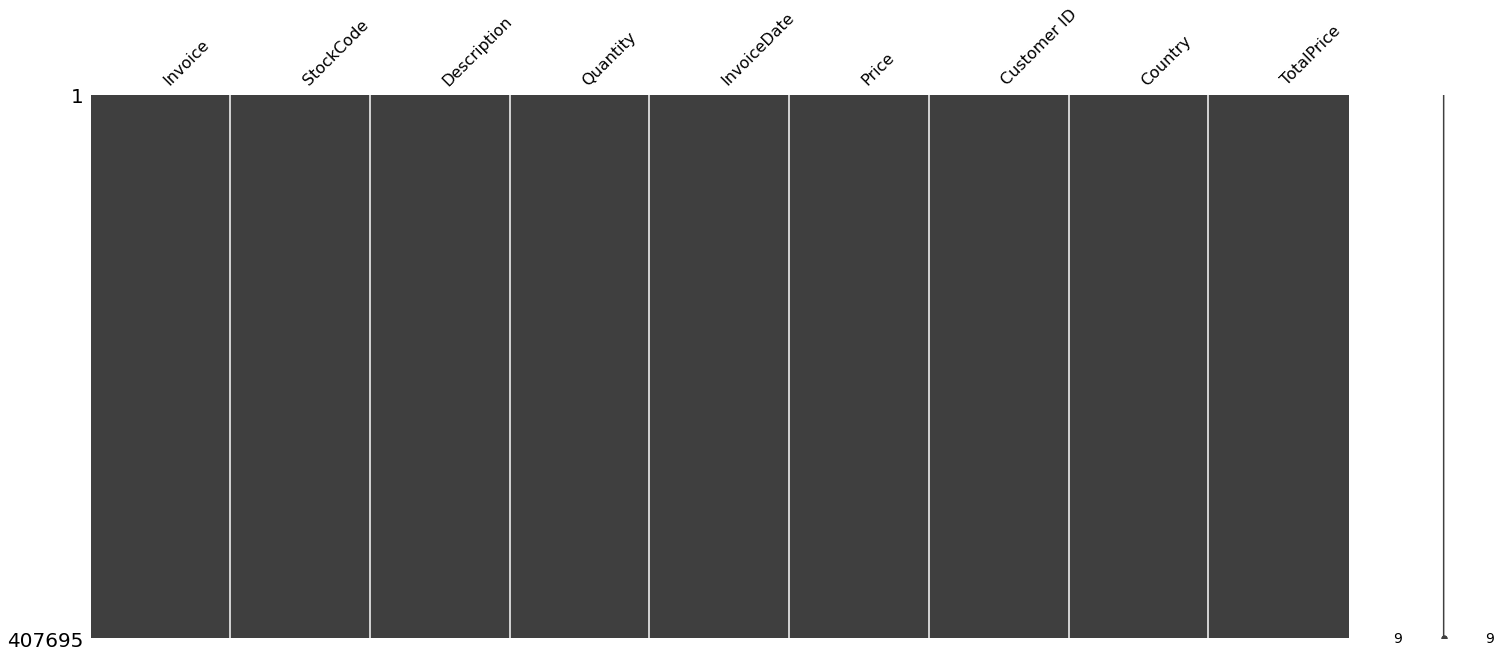

In [30]:
msno.matrix(df)

<AxesSubplot:>

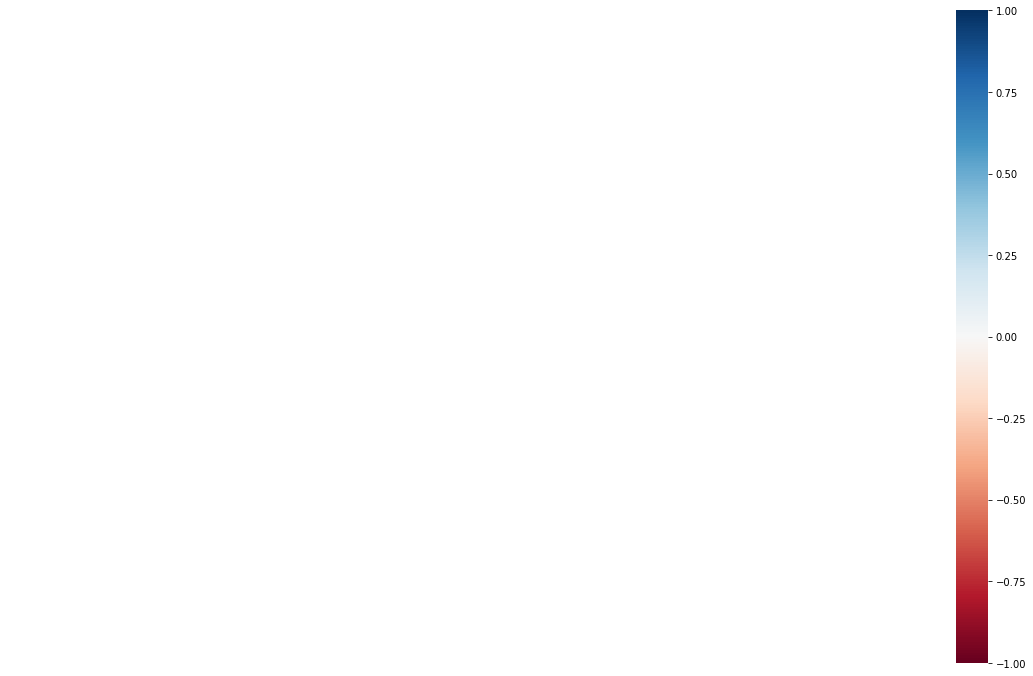

In [31]:
# there is no specific correlation between missing values
msno.heatmap(df)

<AxesSubplot:xlabel='Quantity'>

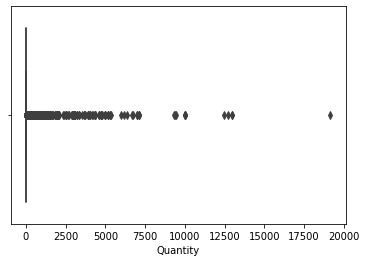

In [32]:
sns.boxplot(df["Quantity"])

<AxesSubplot:xlabel='Price'>

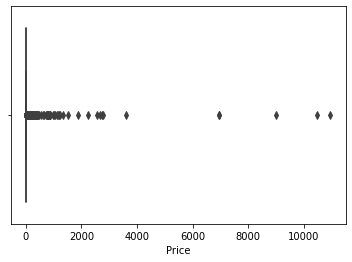

In [33]:
sns.boxplot(df["Price"])

<AxesSubplot:xlabel='Description'>

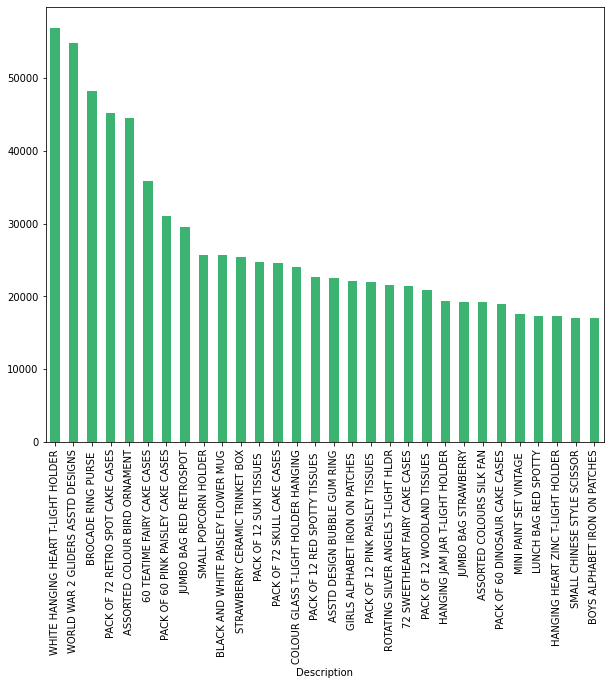

In [34]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
df.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [35]:
#Top 8 Countries With Popular Products
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

<font color = '#F1C40F'>

 <a id = "7"></a><br>
# Data Preprocessing

<font color = '#D35400'>
Outlier values are trimmed (very little) without damaging the data.Here we have set a lower and upper limit. But since the lower limit is set, we'll only assign it to the upper limit. We'll do it for Quantity and Price.

In [36]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [37]:
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"Price")

In [38]:
# outliers values are now cleaner.

df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,407695.0,11.907043,28.729349,1.0,1.00,2.00,5.00,12.00,144.00,358.50
Price,407695.0,3.005391,3.250550,0.0,0.29,1.25,1.95,3.75,14.95,36.94
Customer ID,407695.0,15368.504107,1679.795700,12346.0,12435.00,13997.00,15321.00,16812.00,18196.00,18287.00
TotalPrice,407695.0,21.663261,77.147356,0.0,0.65,4.95,11.90,19.50,201.60,15818.40


<font color = '#D35400'>
Missing values are deleted. Canceled Invoices are not received and and a new variable was created.

In [39]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    return dataframe



In [40]:
df=crm_data_prep(df)
check_df(df)


AttributeError: Can only use .str accessor with string values!

<font color = '#D35400'>
Variables are as follows after they are cleared of outliers values.

<AxesSubplot:xlabel='Quantity'>

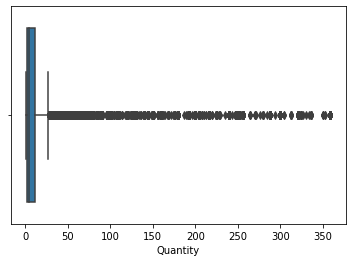

In [41]:
sns.boxplot(df["Quantity"])

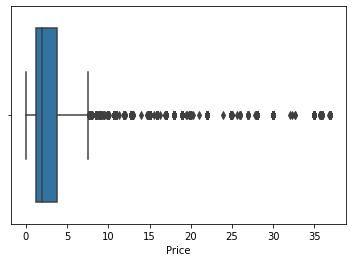

In [42]:
sns.boxplot(df["Price"]);

 <font color = '#F1C40F'>

<a id = "10"></a><br>
# RFM


 <font color = '#34495E'>


 Now, we are creating RFM.

  <a id = "11"></a><br>
 ### What is RFM?
<p><img style="float: right;margin:-10px 20px 20px 5px; max-width:380px" src="https://miro.medium.com/max/1400/1*HiwX6vul8c4PBEueq3yBMw.png"><p>RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?
Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10.
    
    * Quelle https://en.wikipedia.org/wiki/RFM_(market_research)





In [43]:
 # When was the last time a customer made a purchase?

df["InvoiceDate"].max()


Timestamp('2010-12-09 20:01:00')

In [ ]:
# In order to get logical results and avoid zero values, we set 2 days later as today's date.
today_date = dt.datetime(2011, 12, 11)
today_date

In [ ]:
def create_rfm(dataframe):
    # RFM Metrics
    

    today_date = dt.datetime(2010, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # RFM score
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])



    # segment naming
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm




In [ ]:
rfm = create_rfm(df)
rfm.head()

<a id = "12"></a><br>
Then segments are created. 

**So why are we doing this?**

We look for answers to these questions;

-Who is our most profitable customer?
-What is it they appreciate in my products or services?
-Who are my new customers?
-How do I attract new customers to the company?

The answers to the questions are hidden in the segmentation.

With better RFM segmentation, we’ll be able to address certain segments in a personalized manner, based on their needs and preferences.

Browse the scheme to more easily understand segmentation.



![](https://images.squarespace-cdn.com/content/v1/5846da08f5e231d83261e223/1624227413790-Z1UYINIFMP4SYO77JTWV/rfm_grid.png) 

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="frequency", data=rfm)

In [ ]:
check_df(rfm)

<font color = '#F1C40F'>
<p><img style="float: right;margin:-10px 20px 20px 5px; max-width:380px" src="https://www.the-digital-insurer.com/wp-content/uploads/2020/10/CLV2-800x655.png">
 

<a id = "13"></a><br>

 #   What is Customer Lifetime Value(CLV or CLTV)?
    
    


<font color = '#34495E'>



Customer lifetime value (CLV) is a measure of the total income a business can expect to bring in from a typical customer for as long as that person or account remains a client.

When measuring CLV, it’s best to look at the total average revenue generated by a customer and the total average profit. Each provides important insights into how customers interact with your business and if your overall marketing plan is working as expected.

For a more in-depth look, you may want to break down your company’s CLV by quartile or some other segmentation of customers. This can give greater insight into what’s working well with high-value customers, so you can work to replicate that success across your entire customer base.
    
  * Quelle https://www.netsuite.com/portal/resource/articles/ecommerce/customer-lifetime-value-clv.shtml


<font color = '#F1C40F'>
    
<a id = "14"></a><br>

### CLTV Calculated

<font color = '#D35400'>

* This time we divided people into A, B, C segments. (Not to be confused with rfm segmentation.) Let's remember we do life-time value calculations.

* The calculations in the table have been made.

* Standardization process was done for better understanding.

In [ ]:

def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    dataframe['profit_margin'] = dataframe['monetary'] * 0.05

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate) * dataframe['profit_margin']

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(dataframe[["cltv"]])
    dataframe["cltv_calculated"] = scaler.transform(dataframe[["cltv"]])

    dataframe["cltv_calculated_segment"] = pd.qcut(dataframe["cltv_calculated"], 3, labels=["C", "B", "A"])

    dataframe = dataframe[["recency", "frequency", "monetary", "rfm_segment",
                           "cltv_calculated", "cltv_calculated_segment"]]

    return dataframe



In [ ]:
rfm_cltv = create_cltv_calculated(rfm)
check_df(rfm_cltv)


In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="cltv_calculated", data=rfm_cltv)

In [ ]:
rfm_cltv.head()

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv)

<font color = '#F1C40F'>
    
<a id = "15"></a><br>

### CLTV Preticted

<a id = "16"></a><br>
 What is a cohort model?

Instead of simply assuming all the customers to be one group, we can try to split them into multiple groups and calculate the CLTV for each group. 

 **Note**: recency value customized. (One of the key differences between RFM and CLTV)

<a id = "17"></a><br>
### BG-NBD


In short, expected sales value. Used to estimate how many purchases customers can make over a period of time

This method computes the probability that a customer with history (frequency, recency_weekly, T_weekly) is currently alive.(relationship between recency & frequency)

<a id = "18"></a><br>
### Gamma Gamma

-conditional expected number of purchases up to time-

**Note1**: There should be no correlation between the **frequency of transactions** and **their monetary value.**

**Note2:** We are considering only customers who made repeat purchases with the business i.e., frequency > 0. Because, if the frequency is 0, it means that they are a one-time customer and are considered already dead.


In [ ]:
# The correlation seems very weak. 

plt.scatter(rfm_cltv.monetary,rfm_cltv.frequency,s=75)


plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [ ]:
def create_cltv_predicted(dataframe):
    today_date = dt.datetime(2010, 12, 11)

    ## recency value customized
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    rfm.columns = rfm.columns.droplevel(0)

    ## recency_cltv_predicted
    rfm.columns = ['recency_cltv_predicted', 'T', 'frequency', 'monetary']

    ## basic monetary_avg
    rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

    rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)


  
    ## recency_weekly_cltv_predicted
    rfm["recency_weekly_cltv_predicted"] = rfm["recency_cltv_predicted"] / 7
    rfm["T_weekly"] = rfm["T"] / 7



    # CONTROL
    rfm = rfm[rfm["monetary_avg"] > 0]

    ## recency filter
    rfm = rfm[(rfm['frequency'] > 1)]

    rfm["frequency"] = rfm["frequency"].astype(int)

    # BGNBD
    bgf = BetaGeoFitter(penalizer_coef=0.01)
    bgf.fit(rfm['frequency'],
            rfm['recency_weekly_cltv_predicted'],
            rfm['T_weekly'])


    # Gamma Gamma
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(rfm['frequency'], rfm['monetary_avg'])
    rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                             rfm['monetary_avg'])
    # 6 months cltv_p
    cltv = ggf.customer_lifetime_value(bgf,
                                       rfm['frequency'],
                                       rfm['recency_weekly_cltv_predicted'],
                                       rfm['T_weekly'],
                                       rfm['monetary_avg'],
                                       time=6,
                                       freq="W",
                                       discount_rate=0.01)

    rfm["cltv_predicted"] = cltv

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(rfm[["cltv_predicted"]])
    rfm["cltv_predicted"] = scaler.transform(rfm[["cltv_predicted"]])

    # rfm.fillna(0, inplace=True)

    # cltv_predicted_segment
    rfm["cltv_predicted_segment"] = pd.qcut(rfm["cltv_predicted"], 3, labels=["C", "B", "A"])

    ## recency_cltv_predicted, recency_weekly_cltv_predicted
    rfm = rfm[["recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]


    return rfm


In [ ]:
rfm_cltv_predicted = create_cltv_predicted(df)
check_df(rfm_cltv_predicted)

In [ ]:
rfm_cltv_predicted.head()

In [ ]:
rfm_cltv_predicted.groupby('cltv_predicted_segment').agg('expected_average_profit').mean().plot(kind='bar', colormap='copper_r');

plt.ylabel("profit");



<font color = '#F1C40F'>
    
<a id = "19"></a><br>
    
# Result!

In [ ]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="Customer ID", how="left")
check_df(crm_final)

In [ ]:
# will be effective in campaign decisions

crm_final.sort_values(by="monetary_avg", ascending=False).head()

<font color = '#D35400'>
    
<a id = "20"></a><br>

# Summary

* The result of my analysis is that we can reach customers in different segments and offer them different campaigns.